# The dataset for regression

In [4]:
from lifelines.datasets import load_rossi
rossi = load_rossi()
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


### Interpretation
The dataset required for survival regression must be in the format of a Pandas DataFrame. Each row of the DataFrame represents an observation. There should be a column denoting the durations of the observations. There may (or may not) be a column denoting the event status of each observation (1 if event occurred, 0 if censored). There are also the additional covariates you wish to regress against. Optionally, there could be columns in the DataFrame that are used for stratification, weights, and clusters which will be discussed later in this tutorial.

# Fitting the regression

In [3]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2021-01-20 13:43:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

### Interpretation
Taking a look at these coefficients for a moment, prio (the number of prior arrests) has a coefficient of about 0.09. Thus, a one unit increase in prio means the the baseline hazard will increase by a factor of exp(0.09)=1.10 - about a 10% increase. 

# Plotting the coefficients

<AxesSubplot:xlabel='log(HR) (95% CI)'>

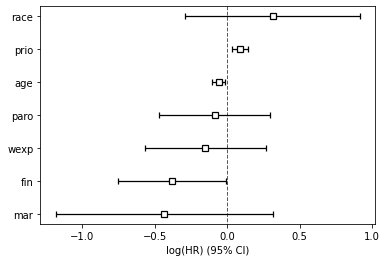

In [4]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.plot()

### Interpretation
After fitting, we can plot what the survival curves look like as we vary a single covariate while holding everything else equal. This is useful to understand the impact of a covariate, given the model. To do this, we use the plot_partial_effects_on_outcome() method and give it the covariate of interest, and the values to display.

# Plotting the effect of varying a covariate

After fitting, we can plot what the survival curves look like as we vary a single covariate while holding everything else equal. This is useful to understand the impact of a covariate, given the model. To do this, we use the plot_partial_effects_on_outcome() method and give it the covariate of interest, and the values to display.

<AxesSubplot:>

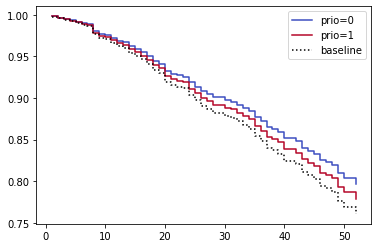

In [5]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 1], cmap='coolwarm')

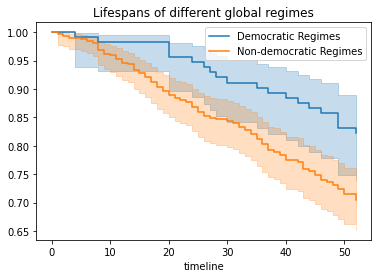

In [8]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

ax = plt.subplot(111)

df = rossi
data = (df["prio"] == 1)

T = rossi["week"]
E = rossi["arrest"]

kmf.fit(T, event_observed=E)

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");


Text(0.5, 1.0, 'Lifespans of different global regimes')

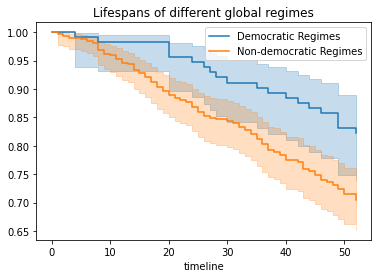

In [7]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

ax = plt.subplot(111)

dem = (rossi["prio"] == 1)

T = rossi["week"]
E = rossi["arrest"]

kmf.fit(T, event_observed=E)

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes")


In [ ]:
data = rossi
DURATION = 'week'
EVENT = 'arrest'
T = data[DURATION]

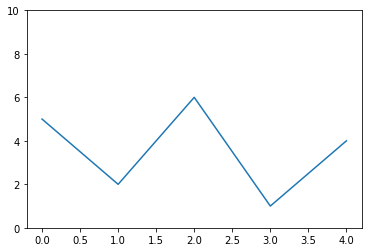

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import time

fig, ax = plt.subplots()

max_x = 5
max_rand = 10

x = np.arange(0, max_x)
ax.set_ylim(0, max_rand)
line, = ax.plot(x, np.random.randint(0, max_rand, max_x))
the_plot = st.pyplot(plt)

def init():  # give a clean slate to start
    line.set_ydata([np.nan] * len(x))

def animate(i):  # update the y values (every 1000ms)
    line.set_ydata(np.random.randint(0, max_rand, max_x))
    the_plot.pyplot(plt)

init()
for i in range(100):
    animate(i)
    time.sleep(0.1)